# COGS 108 - Final Project 

# Overview

*Fill in your overview here*

# Name & GitHub ID

- Name: Ayaan Gill
- GitHub Username: OpTicAyaaN

# Research Question

Is there a correlation between crime rates and the access to public parks in San Diego?

## Background and Prior Work

San Diego's Parks and Recreation Department helps to drive not only the city's economy, but its community as well, as it offers programs and other opportunities for all members of its community, including opportunities for at-risk youth. (1) 
A CDC study found that despite the benefits of a park to a community and its residents, increased crime rates surrounding parks often deterred people from using the parks. (2) 

References (include links):
- 1) https://www.sandiego.gov/sites/default/files/fastfacts.pdf
- 2) https://www.cdc.gov/pcd/issues/2020/19_0434.htm

# Hypothesis


I hypothesize that San Diego's crime rates will be detrimentally impacted in areas with less access to parks. This is because research in other cities has shown that parks in areas with higher crime rates are often rated lower and less attended than those in lower crime rate areas.

# Dataset(s)

- Dataset Name: Police Calls for Service 2019
- Link to the dataset: http://seshat.datasd.org/pd/pd_calls_for_service_2019_datasd.csv
- Number of observations: 590967
- Description: This dataset provides a list of police calls and information about each call, including reason and the SDPD beat (location code used by police) for each call.


- Dataset Name: Police Beats
- Link to the dataset: http://seshat.datasd.org/sde/pd/pd_beats_datasd.geojson
- Number of observations: 140
- Description: This dataset provides geolocation data of the SDPD beat codes used in the Police Calls for Service dataset.


- Dataset Name: Park Locations
- Link to the dataset: http://seshat.datasd.org/sde/parks/parks_datasd.geojson
- Number of observations: 2769
- Description: This dataset contains geolocation data on all of the parks managed by the City of San Diego Parks & Recreation Department.


In order to use these datasets together, I will count how many parks (from Park geojson data) are in each 

# Setup

In [1]:
#Imports
%matplotlib inline

import numpy as np
import pandas as pd
import geopandas as gpd
import geoplot as gplt
import matplotlib.pyplot as plt

# Data Cleaning

Describe your data cleaning steps here.

In [2]:
#Creating geodataframes from geospatial datasets
beats_geo = gpd.read_file('http://seshat.datasd.org/sde/pd/pd_beats_datasd.geojson')
parks_geo = gpd.read_file('http://seshat.datasd.org/sde/parks/parks_datasd.geojson')

#Counting calls per beat
calls = pd.read_csv('http://seshat.datasd.org/pd/pd_calls_for_service_2019_datasd.csv')
calls = calls[['beat']]
callcount = calls.value_counts().rename_axis('beat').reset_index(name='calls')

In [3]:
#Counting acreage of parks per beat
parks_in_beats = gpd.sjoin(beats_geo, parks_geo, how="left", op="intersects")
parks_in_beats = parks_in_beats[['beat', 'geometry', 'name_right', 'alias', 'gis_acres']]
park_acres = parks_in_beats.groupby('beat')['gis_acres'].sum().reset_index()
park_acres.columns = ['beat', 'acres']

#Creating combined dataframe of police calls and park acreage by beat
combined = callcount.merge(park_acres, how='outer', on='beat')

#Dropping values with invalid beat codes and sorting
combined = combined[combined['beat'] > 100]
combined = combined[combined['beat'] < 1000]
combined = combined.sort_values('beat').reset_index(drop=True)

# Data Analysis & Results

Include cells that describe the steps in your data analysis.

0.06812878670539324


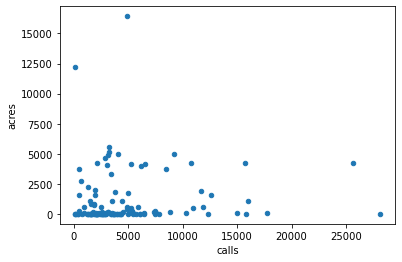

In [4]:
plt1 = combined.plot.scatter(x='calls', y='acres')
correlation = combined['calls'].corr(combined['acres'])
print(correlation)

This plot shows the number of service calls and acres of parks for each SDPD beat. It shows several outliers 

Because the pearson's correlational constant between police calls and park acreage by beat is below 0.1, we can say there is not a significant linear relationship between the two.

# Ethics & Privacy

The analysis of this dataset for our purposes would not pose privacy or ethical concerns, as it uses publicly available government-provided data with no personally identifiable information.

There is potentially bias in the reported data for reported phone calls, but the beats and parks are geographically defined areas by the government, which is the source of my data for parks and beats.

# Conclusion & Discussion

*Fill in your discussion information here*